<a href="https://colab.research.google.com/github/konaanitha/CodelabsIT496/blob/main/ANithak_A11aDistribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import tensorflow_probability as tfp
tfd = tfp.distributions

In [2]:
simulationDF= pd.read_csv("/content/drive/MyDrive/IT496/cpathdata.csv")
simulationDF.head(2)

,Unnamed: 0,A,B,C,D,E,F,G,H,I,J,EOP
0,0,6.198352,4.340188,2.839222,2.880873,6.479433,4.190762,5.157021,2.250215,22.428062,2.256191,NaN
1,1,6.077044,4.563809,3.233402,2.540941,5.928355,5.522196,6.718718,3.256538,14.424508,2.954931,NaN


In [3]:
paths=['ADEJ','BCDEJ','BCFGJ','BCFHJ','BI']
pathsDf= pd.DataFrame(columns=paths)
ADEJ=[]
BCDEJ=[]
BCFGJ=[]
BCFHJ=[]
BI=[]

for index, row in simulationDF.iterrows():
  ADEJ.append(row['A']+ row['D']+row['E']+row['J'])
  BCDEJ.append(row['B']+ row['C']+row['D']+row['E']+row['J'])
  BCFGJ.append(row['B']+ row['C']+row['F']+row['G']+row['J'])
  BCFHJ.append(row['B']+ row['C']+row['F']+row['H']+row['J'])
  BI.append(row['B']+row['I'])

pathsDf['ADEJ']= ADEJ
pathsDf['BCDEJ']=BCDEJ
pathsDf['BCFGJ']=BCFGJ
pathsDf['BCFHJ']=BCFHJ
pathsDf['BI'] = BI

pathsDf.head(2)

,ADEJ,BCDEJ,BCFGJ,BCFHJ,BI
0,17.81485,18.795907,18.783385,15.876578,26.768250
1,17.50127,19.221438,22.993056,19.530877,18.988317


In [8]:
pathsDf['critical']= pathsDf.idxmax(axis=1)
pathsDf

,ADEJ,BCDEJ,BCFGJ,BCFHJ,BI,critical
0,17.814850,18.795907,18.783385,15.876578,26.768250,BI
1,17.501270,19.221438,22.993056,19.530877,18.988317,BCFGJ
2,18.409781,19.748419,19.365153,21.224615,17.516446,BCFHJ
3,16.628032,20.376951,20.844393,18.818322,12.904623,BCFGJ
4,17.441427,21.069384,20.119055,21.424699,16.041961,BCFHJ
...,...,...,...,...,...,...
995,17.912881,18.364675,14.999177,12.372767,14.605950,BCDEJ
996,19.547461,18.983434,18.861357,16.716476,20.483598,BI
997,19.104620,22.372875,18.960738,21.616753,22.799974,BI
998,17.699410,18.822710,15.161239,17.593351,12.393804,BCDEJ


In [9]:
df1 = pathsDf['critical'] .value_counts()
df1

BCDEJ    332
BCFGJ    244
BI       214
BCFHJ    164
ADEJ      46
Name: critical, dtype: int64

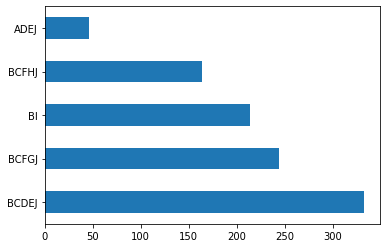

In [10]:
df1.plot(kind ='barh')